In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_csv(r"C:\Users\Zana\Desktop\portfolio_projects\3. Marketing Campaign Regression Analysis\cleaned_marketing.csv")
print(df.head())

   id      c_date    campaign_name    category  campaign_id  impressions  \
0   1  2021-02-01   facebook_tier1      social       349043       148263   
1   2  2021-02-01   facebOOK_tier2      social       348934       220688   
2   3  2021-02-01       google_hot      search     89459845        22850   
3   4  2021-02-01      google_wide      search       127823       147038   
4   5  2021-02-01  youtube_blogger  influencer        10934       225800   

   mark_spent  clicks  leads  orders  revenue  
0     7307.37    1210     13       1   4981.0  
1    16300.20    1640     48       3  14962.0  
2     5221.60     457      9       1   7981.0  
3     6037.00    1196     24       1   2114.0  
4    29962.20    2258     49      10  84490.0  


# 2. Simple Linear Regression

In this step, we will build a simple linear regression model using the variable `mark_spent` to predict `revenue`. The model will be evaluated using key performance metrics.

## Key Points:
- **Objective**: Determine the impact of marketing spend on revenue.
- **Evaluation Metrics**: We will use R-squared, RMSE, and MAE to assess the model's accuracy.


In [3]:
# Focus only on 'mark_spent' to predict 'revenue'
X = df[['mark_spent']]  # Independent variable (mark_spent)
y = df['revenue']  # Dependent variable (revenue)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using R-squared, RMSE, and MAE
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Output the evaluation metrics
print(f'R-squared: {r_squared}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

R-squared: 0.5761201463930175
RMSE: 223586.196704492
MAE: 92960.24282430112


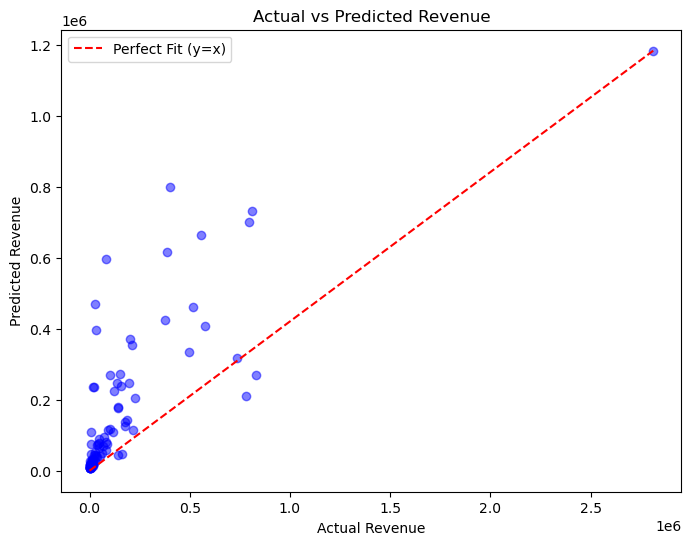

In [4]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted revenue
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_pred)], color='red', linestyle='--', label='Perfect Fit (y=x)')
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.legend()
plt.show()


### Actual vs Predicted Revenue - Marketing Campaign

**Objective:**
- The scatter plot illustrates the relationship between **actual revenue** and **predicted revenue** based on a simple linear regression model where **marketing spend** is used to predict revenue.

**Insights:**

- **Data Distribution:**
  - Most of the data points are concentrated near the origin, indicating that the model tends to predict lower revenues more accurately.
  - As the actual revenue increases, the predicted revenue also increases, suggesting that the model captures higher revenues better at larger values.

- **Perfect Fit Line (y=x):**
  - The **red dashed line** represents the perfect scenario where **predicted revenue equals actual revenue**.
  - A majority of points lie below this line, which means that the model tends to **underestimate** the actual revenue, especially for campaigns with higher revenues.
  - The model shows reasonable performance for lower revenue campaigns, but the predictions deviate significantly for higher revenue campaigns, with a larger gap between actual and predicted values.

- **Outliers:**
  - Some points deviate significantly from the perfect fit, particularly in the higher revenue range. These are likely outliers, suggesting that marketing spend may not have had the expected impact on revenue for these campaigns, or that additional features could help explain the discrepancies.

**Conclusion:**
- The model provides a moderate prediction of actual revenue, but it tends to underestimate higher revenues. Incorporating additional features or exploring more complex models could improve the prediction accuracy for high-value campaigns.


# Simple Linear Regression Summary

## Objective
This analysis aims to determine the impact of marketing spend (`mark_spent`) on revenue through a simple linear regression model.

## Key Results:
- **R-squared**: 0.576 – The model explains 57.6% of the variance in revenue using marketing spend.
- **RMSE**: 223,586.20 – On average, the model's revenue predictions deviate from actual values by 223,586.
- **MAE**: 92,960.24 – The average absolute error between predicted and actual revenue is 92,960.

## Conclusion:
The simple linear regression model shows a moderate relationship between marketing spend and revenue. Further analysis with additional features may improve the model's accuracy.